# ECS759P Lab6 Part 2: Neural networks for Classification

The purpose of this lab is to implement MLPs by yourself using the `PyTorch` framework to understand how it works. This lab allows to explore the impact of hyperparameters on Neural Networks.

This tutorial will explain the basics on how to implement a neural network with `PyTorch`.

## AND Gate with a Neural Network:

We want to create a function that takes 2 inputs, and calculates the logic `AND` operation between both, $I_1 \& I_2$.
The truth table for an `AND` gate is:

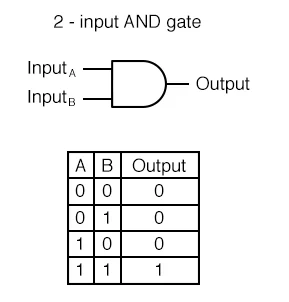

If we plot the input-output space of this operation, we can see that it is linearly separable:

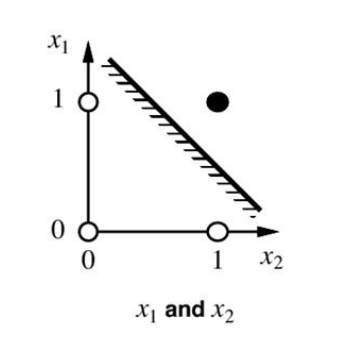

We will implement the following single-layer perceptron with `PyTorch`:

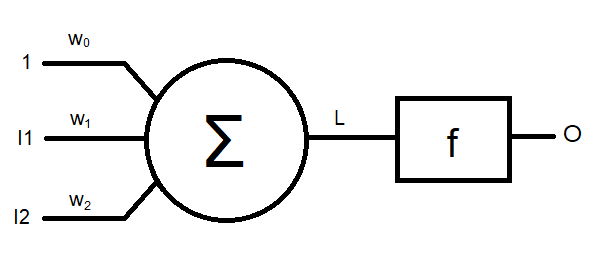

Where $w_0, w_1$, and $w_2$ are the weights of the inputs. The inputs will be added together in a linear combination $L = \sum I_i w_i$. This combination goes trough a nonlinear activation function $f$ where the output $O = f(L)$.

Since the output of an AND gate is 0 or 1, we will use a Sigmoid activation, which produces an output between 0 and 1.

In [ ]:
import torch
import torch.nn as nn
import numpy as np

# We create our own custom Network called "AND_Gate"
class AND_Gate(nn.Module):
# We need to define __init__ which is the initialization of the internal structure
    def __init__(self):
        super(AND_Gate, self).__init__() # Call the base constructor first!
        self.layer1 = nn.Linear(2, 1)  # We define linear operation with 2 inputs and 1 output

# Forward function defines what happens when we input something into NN: I -> forward -> O
    def forward(self, x):
        x.view(-1,2) # Transform the tensor shape to fit into the perceptron
        # Number of inputs, in this case 2

        # We have already defined the layer:
        x = self.layer1(x) # We perform the linear operation
        x = torch.sigmoid(x) # We pass the result to the sigmoid activation function
        return x # Forward pass completed

my_and = AND_Gate()
print(my_and)

It is really easy to define your own neural network. You just need to define the layers and then define the "forward pass" operation.

You probably saw the word **Tensor** in the neural network literature.
A tensor, similar to a `numpy` array, represents a lot of data in numerical arrays and matrices.
Usage of torch tensors is very easy and is similar to `numpy`. You can even transform a numpy array to a `PyTorch` tensor.

In [ ]:
a = np.array([1, 2, 3, 4, 5, 6])

# Note that this code won't run
# b = a.numpy()

b = torch.from_numpy(a) # Obtains a tensor b from an numpy array a

# This function is similar to np.reshape, it will reshape the tensor x to a "2 rows, any column" shape
b = b.view(2, -1)

For a very easy tutorial on how to use tensors, we recommend:

https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html

Now that we defined our neural network, let's try giving it an input.

We define our AND table in python:

In [ ]:
AND_data = np.array([[0,0,0],[0,1,0],[1,0,0],[1,1,1]],dtype='float32') # Torch will work with float32 data type
print(AND_data)

Each row is a new "data element", including Inputs (1st and 2nd) and the actual output (3rd element).

Let's see if our neural network can calculate the correct output:

In [ ]:
desired_pair = 1 # We choose which input combination to use
input_pair = AND_data[desired_pair,:2] # Just the inputs, not the output
print(input_pair)
input_pair = torch.from_numpy(input_pair) # Transform into a torch tensor
print(input_pair)

out = my_and(input_pair) # This will directly run the "forward" function!
print("The result is:" + str(out))

In [ ]:
# Let's try all the data at once
input_pairs = AND_data[:,:2] # Get all the data
input_pairs = torch.from_numpy(input_pairs) # Transform to a tensor
print(input_pairs)

out = my_and(input_pairs)
print("The results are:" + str(out))

As you can see, the results are completely wrong since we have not trained our neural network yet.
To train the network we need 2 things:

*   **Loss criterion,**  which defines the error between the desired output and the real output. A very common loss is the `Mean Square Error (MSE)` loss, but there are other popular criterions, such as `Cross Entropy Loss` commonly used for binary classification.
*   **Optimization Method,** for example, `Gradient Descent` with Backpropagation.  

Let's define them:

In [ ]:
my_loss_criterion = nn.MSELoss() # We use the MSE in this case

target = AND_data[:,2].reshape(-1,1) # Get the target date from last column of AND_data
target = torch.from_numpy(target) # Convert to a tensor
loss = my_loss_criterion(out, target) # Calculate the total loss
print(loss)

Weight optimization:

In [ ]:
optimizer = torch.optim.SGD(my_and.parameters(), lr=0.3) # We will use the Stochastic Gradient Descent (SGD) optimization
# First parameter is the target of the optimization, in this case, the parameters of the AND neural network
# Second parameter is the learning rate

Now that you know how to:
1. Create your custom Neural Network
2. Test it
3. Calculate the loss
4. Optimize parameters using the loss

You just need to repeat steps 1-4 many times (`epochs`, passes over the entire training dataset).
Let's repeat this process for 30 epochs:

In [ ]:
epochs = 500
for epoch in range(0,epochs):
  optimizer.zero_grad() # Reset the gradients
  out = my_and(input_pairs) # Calculate outputs
  loss = my_loss_criterion(out,target) # Calculate the loss
  loss.backward() # Calculate the gradient
  optimizer.step() # Update the parameters

print("After " + str(epochs) + " epochs, this is the new set of outputs:")
out = my_and(input_pairs) # Apply the trained NN
print(out)
print("And the loss is:")
loss = my_loss_criterion(out,target)
print(loss)

You can see that we converge to the correct values after many epochs only.
Improvements to this model could be, for example, using the Cross Entropy Loss criterion instead of MSE (better for the binary classification), or even run the optimization for each input instead of the average MSE.

You could try a similar thing with the OR_gate, which is also linearly separable but has a different set of outputs.

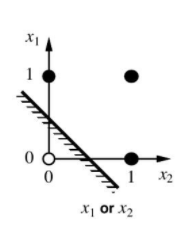

In [ ]:
# Training of the OR gate
OR_data = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,1]],dtype='float32') # Torch will work with the float32 data type
input_pairs = OR_data[:,:2] # Get all the data
input_pairs = torch.from_numpy(input_pairs) # Transform into a tensor

target = OR_data[:,2].reshape(-1,1) # Get the target from the last column of OR_data
target = torch.from_numpy(target) # Convert into tensor

epochs = 500
for epoch in range(0,epochs):
  optimizer.zero_grad() # Reset the gradients
  out = my_and(input_pairs) # Calculate the outputs
  loss = my_loss_criterion(out,target) # Calculate the loss
  loss.backward() # Calculate the gradient
  optimizer.step() # Update the parameters

print("After " + str(epochs) + " epochs, this is the new set of outputs:")
out = my_and(input_pairs) # Perform this operation with a trained NN
print(out)
print("And the loss is:")
loss = my_loss_criterion(out,target)
print(loss)


How about a XOR gate? The truth table is:

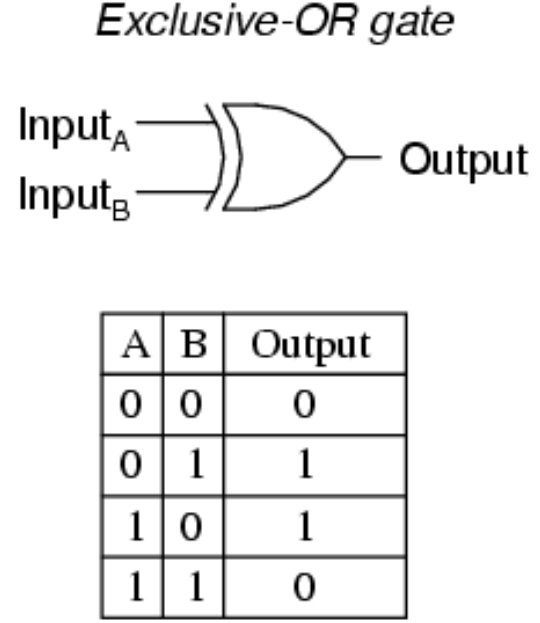

This problem is NOT linearly separable:

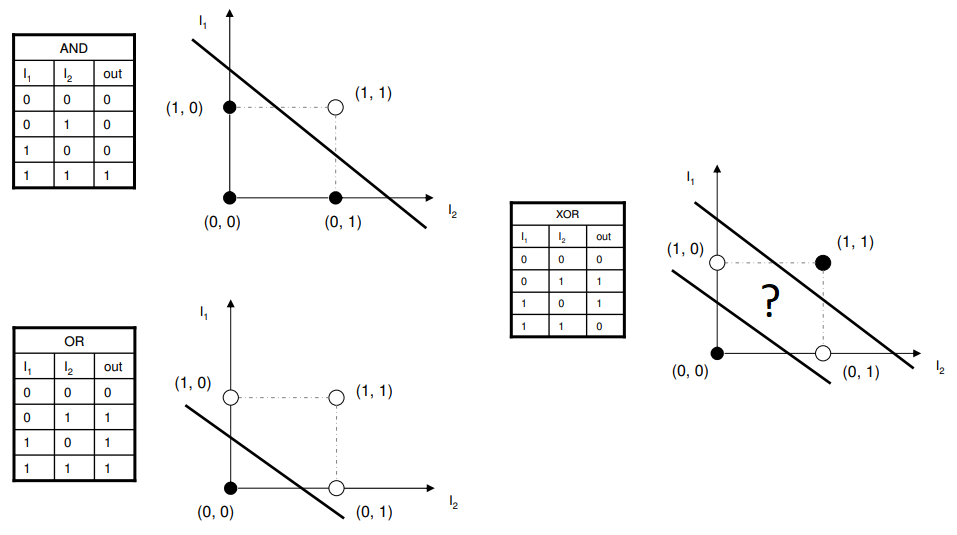

But in can be separated by two lines.

The XOR gate problem can be solved by two layers of perceptrons, as follows:

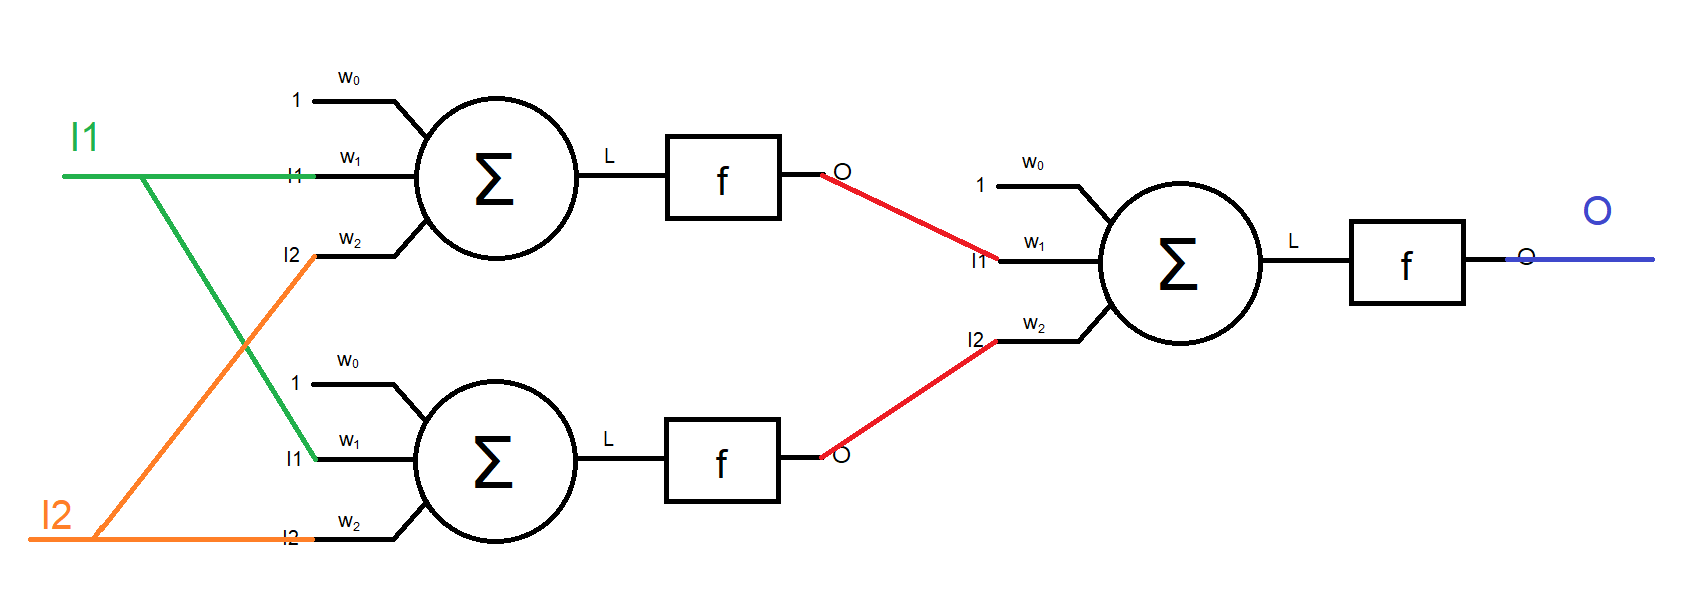

This layout is enough to solve the XOR problem.
It contains 2 layers:
* First Layer: 2 inputs 2 outputs
* Second Layer: 2 inputs, 1 output

This kind of neural network is called a multi-layer perceptron:

In [ ]:
import torch
import torch.nn as nn
import numpy as np

# Our own custom Network called "XOR_Gate"
class XOR_Gate(nn.Module):
# We need to define __init__ which is the initialization of the internal structure
    def __init__(self):
        super(XOR_Gate, self).__init__() # Call the base constructor first
        # 2 inputs, 1 output channels
        self.layer1 = nn.Linear(2, 2)  # We define linear operation with 2 inputs and 2 outputs
        self.layer2 = nn.Linear(2, 1)  # We define linear operation with 2 inputs and 1 output

# Forward function defines what happens when we input something into NN
    def forward(self, x):
        x.view(-1,2) # Transform the tensor shape to fit into the perceptron
        # Number of inputs, in this case 2

        # We have already defined the layers
        x = self.layer1(x) # We perform the linear operation
        x = torch.sigmoid(x) # We pass the result to the sigmoid activation function
        x = self.layer2(x) # Etc...
        x = torch.sigmoid(x)
        return x # Forward pass completed

my_xor = XOR_Gate()
print(my_xor)

**Q. Train and test the XOR network. Hint: try to increase the learning rate and the epoch count.**

In [ ]:
# TO DO
# Training of the XOR gate
XOR_data = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,0]],dtype='float32') # Torch will work with the float32 data type
input_pairs = XOR_data[:,:2] # Get all the data
input_pairs = torch.from_numpy(input_pairs) # Transform into a tensor

target = XOR_data[:,2].reshape(-1,1) # Get the target from the last column of the XOR_data
target = torch.from_numpy(target) # Convert into a tensor

my_xor = XOR_Gate()
my_loss_criterion = nn.MSELoss()
optimizer = torch.optim.SGD(my_xor.parameters(), lr=5)

epochs = 1000
for epoch in range(0,epochs):
  optimizer.zero_grad() # Reset the gradients
  out = my_xor(input_pairs) # Calculate the outputs
  loss = my_loss_criterion(out,target) # Calculate the loss
  loss.backward() # Calculate the gradient
  optimizer.step() # Update the parameters

print("After " + str(epochs) + " epochs, this is the new set of outputs:")
out = my_xor(input_pairs) # Perform this operation with a trained NN
print(out)
print("And the loss is:")
loss = my_loss_criterion(out,target)
print(loss)

You can try and modify:
* Learning rate
* Number of epochs
* Loss function calculation, if update is per example or per epoch
* Optimizer
* Shape of the neural network (depth and size of each layer)

For additional learning resources, we recomend both the official PyTorch tutorial:

https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html

As well as a Youtube series explaining neural networks with PyTorch in detail:

https://www.youtube.com/watch?v=SKq-pmkekTk&list=PLlMkM4tgfjnJ3I-dbhO9JTw7gNty6o_2m&ab_channel=SungKim